In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [18]:
# Load dataset
dataset_path = "EPL.csv"  # Adjust if needed
transactions = []
with open(dataset_path, "r") as f:
    for line in f:
        transactions.append(line.strip().split(','))


In [19]:
# Convert transactions into DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [20]:
# Display top 5 rows of data
print("Top 5 rows of data:")
print(df.head())

Top 5 rows of data:
              0    0.0      1    1.0   1.06   1.07   1.08   1.09    1.1  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False   True   True   True  False  False  False  False  False  False  ...   
2  False   True   True   True   True  False  False  False  False  False  ...   
3  False  False   True   True   True  False  False  False  False  False  ...   
4  False   True   True   True  False  False  False  False  False  False  ...   

   Southampton  T Bramall  T Harrington  T Robinson   Time  Tottenham  \
0        False      False         False       False   True      False   
1        False      False         False       False  False      False   
2        False      False         False       False  False      False   
3        False      False         False       False  False      False   
4         True      False         False       False  False      False   

   Watford  West Brom  West Ham  Wolves  
0    False      Fa

In [21]:
# Function to find and display rules
def get_association_rules(min_support, min_confidence, min_lift, min_length):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
    rules = rules[(rules['confidence'] >= min_confidence) &
                  (rules['lift'] >= min_lift) &
                  (rules['antecedents'].apply(lambda x: len(x) >= min_length - 1)) &
                  (rules['consequents'].apply(lambda x: len(x) >= 1))]
    return rules


In [22]:
# Find rules with specified parameters
rules1 = get_association_rules(min_support=0.1, min_confidence=0.1, min_lift=2, min_length=2)
print("\nAssociation Rules (Set 1):")
print(rules1.head())

rules2 = get_association_rules(min_support=0.12, min_confidence=0.12, min_lift=2, min_length=2)
print("\nAssociation Rules (Set 2):")
print(rules2.head())


Association Rules (Set 1):
  antecedents consequents  antecedent support  consequent support   support  \
0      (1.72)       (2.1)            0.165714            0.233333  0.130476   
1       (2.1)      (1.72)            0.233333            0.165714  0.130476   
2   (1.72, 0)       (2.1)            0.139524            0.233333  0.109048   
3    (0, 2.1)      (1.72)            0.190952            0.165714  0.109048   
4      (1.72)    (0, 2.1)            0.165714            0.190952  0.109048   

   confidence      lift  representativity  leverage  conviction  \
0    0.787356  3.374384               1.0  0.091810    3.605405   
1    0.559184  3.374384               1.0  0.091810    1.892593   
2    0.781570  3.349586               1.0  0.076492    3.509896   
3    0.571072  3.446126               1.0  0.077404    1.945050   
4    0.658046  3.446126               1.0  0.077404    2.365954   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.843416  0.485816   0.722639    0

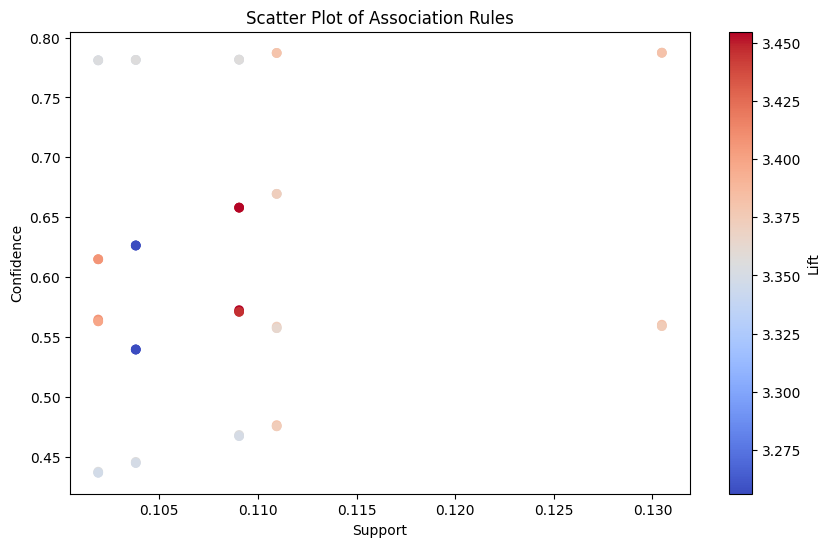

In [23]:
# Scatter Plot of all rules
plt.figure(figsize=(10, 6))
plt.scatter(rules1['support'], rules1['confidence'], c=rules1['lift'], cmap='coolwarm')
plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Scatter Plot of Association Rules")
plt.show()

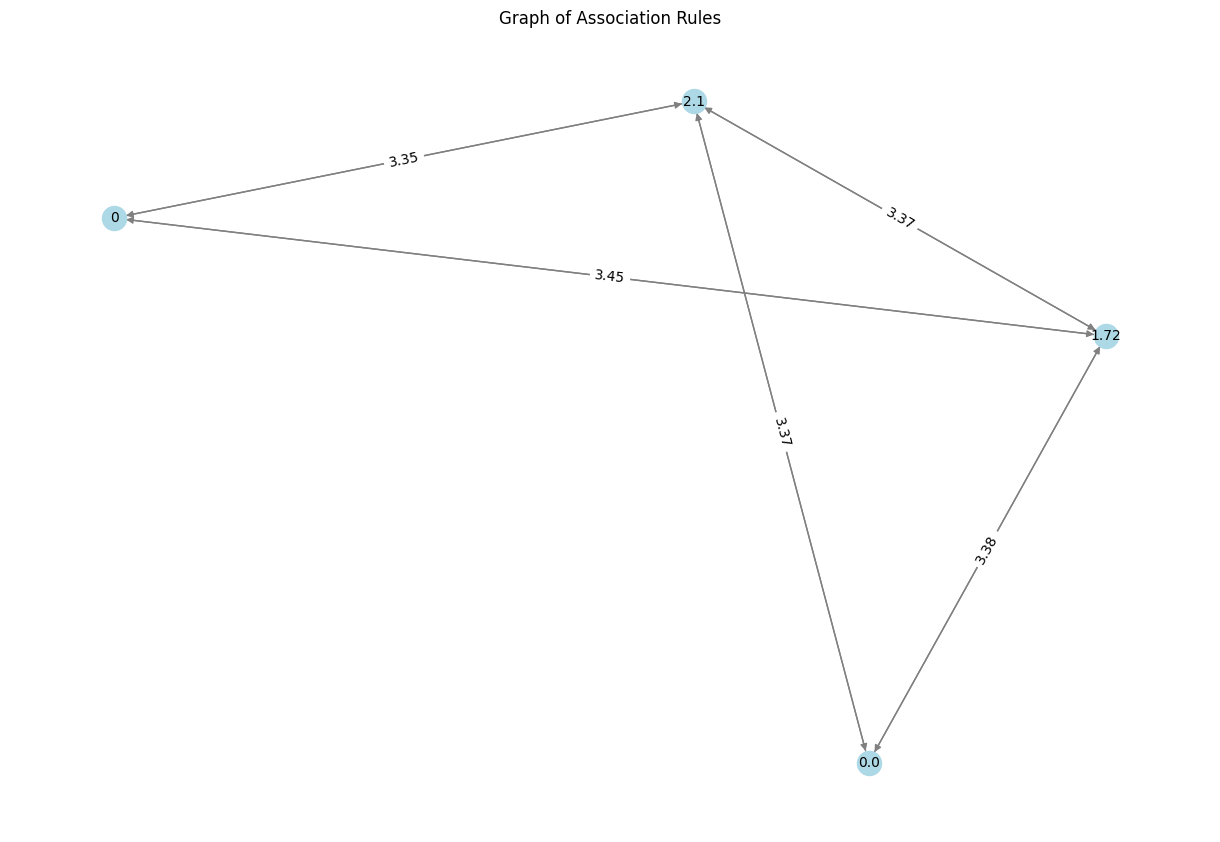

In [24]:
# Graph visualization for the first 20 rules
def draw_graph(rules, num_rules=10):
    G = nx.DiGraph()
    for _, rule in rules.head(num_rules).iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    plt.figure(figsize=(12, 8))
    pos = nx.kamada_kawai_layout(G)  # More stable and visually spaced

    edges = G.edges(data=True)
    nx.draw(G, pos, edge_color='gray', node_color='lightblue', with_labels=True, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
    plt.title("Graph of Association Rules")
    plt.show()

draw_graph(rules1)

In [25]:
def get_fp_growth_rules(df, min_support, min_confidence, min_lift, min_length):
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)    
    rules = rules[(rules['confidence'] >= min_confidence) & 
                  (rules['lift'] >= min_lift) & 
                  (rules['antecedents'].apply(lambda x: len(x) >= min_length - 1)) & 
                  (rules['consequents'].apply(lambda x: len(x) >= 1))]
    rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
    else:
        print("No association rules found for the given thresholds.")
    
    return rules


In [29]:
# Find rules with specified parameters using FP-Growth
rules1 = get_fp_growth_rules(df, min_support=0.1, min_confidence=0.1, min_lift=2, min_length=2)
print("\nFP-Growth Association Rules (Set 1):")
print(rules1.head())

rules2 = get_fp_growth_rules(df, min_support=0.12, min_confidence=0.12, min_lift=2, min_length=2)
print("\nFP-Growth Association Rules (Set 2):")
print(rules2.head())


      antecedents    consequents   support  confidence      lift
24         (1.72)  (0.0, 0, 2.1)  0.109048    0.658046  3.454741
19  (0.0, 0, 2.1)         (1.72)  0.109048    0.572500  3.454741
8          (1.72)       (0, 2.1)  0.109048    0.658046  3.446126
20    (1.72, 0.0)       (0, 2.1)  0.109048    0.658046  3.446126
7        (0, 2.1)         (1.72)  0.109048    0.571072  3.446126
23       (0, 2.1)    (1.72, 0.0)  0.109048    0.571072  3.446126
47  (0.0, 2.1, 3)         (1.72)  0.101905    0.564644  3.407333
52         (1.72)  (0.0, 2.1, 3)  0.101905    0.614943  3.407333
44         (1.72)       (2.1, 3)  0.101905    0.614943  3.398367
48    (1.72, 0.0)       (2.1, 3)  0.101905    0.614943  3.398367

FP-Growth Association Rules (Set 1):
      antecedents    consequents  antecedent support  consequent support  \
24         (1.72)  (0.0, 0, 2.1)            0.165714            0.190476   
19  (0.0, 0, 2.1)         (1.72)            0.190476            0.165714   
8          (1.72)  